# Author: Ahmed Khaled.

### Data Science Intern at CodeClause.
### I aim to do some Data Science about the Fraud Detection Case.

##### Fraud detection is a set of processes and analyses that allow businesses to identify and prevent unauthorized financial activity. This can include fraudulent credit card transactions, identify theft, cyber hacking, insurance scams, and more.

##### You can find the dataset at this link: https://www.kaggle.com/datasets/ealaxi/paysim1?datasetId=1069&sortBy=voteCount

# ************************************************************************************

## Solution Roadmap
1. Importing the necessary packages
2. Loading the dataset
3. Descriptive statistics
4. Visualizing the dataset
5. Splitting the data, dealing with imbalance 
6. Data Pre-Processing
7. Creating and training the model
8. Making predictions
9. Evaluation matrix

### Importing the necessary Packages
- numpy for linear algebra
- pandas for handling the dataframe
- sklearn for the machine learning tools
- matplotlib, seaborn for visualizations

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import warnings

np.random.seed(1)
warnings.filterwarnings('ignore')

### Loading the dataset into a pandas dataframe.
- printing the head of the dataset.

In [113]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [114]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Some Descriptive Statistics
- df.info()  for some information about the dataset
- df.shape  for the how many row and columns are in the dataset.
- df.describe()  for the mean and the 3 quartiles of each column and also the max and min values in each column.
- df.isnull().sum()  To see if there is any missing values in the dataset.
- df.skew()  To see how the data is skewed.

In [115]:
df.info()

# There are no Datatypes constraints here every column is correctly datatyped.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [116]:
df.shape

# How many rows and colums in the dataset.

(6362620, 11)

In [117]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [118]:
df.isnull().sum()

# No missing values in the dataset.

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [119]:
# Knowing the skew is a very important thing, this lets us understand if the data is normaly distribution
# As if the skew gets close to zero this means it is normaly distributed.

print('skew is \n\n', df.skew())

skew is 

 step                0.375177
amount             30.993949
oldbalanceOrg       5.249136
newbalanceOrig      5.176884
oldbalanceDest     19.921758
newbalanceDest     19.352302
isFraud            27.779538
isFlaggedFraud    630.603629
dtype: float64


In [120]:
# This line of code shows us how many values of each unique category in the target variable.

print('How many entry in each target class \n\n', df['isFraud'].value_counts()) 

# the target column is imbalanced.

How many entry in each target class 

 0    6354407
1       8213
Name: isFraud, dtype: int64


### some Data Visualizations
- Distributions  : The distribution of the target variable to see if it's balanced or not.
- Correlation Matrix  : To see how each column is correlated to every column.
- Scatter Matrix  : Scatter plots for every column
- Pie Chart  : Showing the number of Fraud and NOT Fraud categories.

array([[<AxesSubplot: title={'center': 'step'}>,
        <AxesSubplot: title={'center': 'amount'}>,
        <AxesSubplot: title={'center': 'oldbalanceOrg'}>],
       [<AxesSubplot: title={'center': 'newbalanceOrig'}>,
        <AxesSubplot: title={'center': 'oldbalanceDest'}>,
        <AxesSubplot: title={'center': 'newbalanceDest'}>],
       [<AxesSubplot: title={'center': 'isFraud'}>,
        <AxesSubplot: title={'center': 'isFlaggedFraud'}>,
        <AxesSubplot: >]], dtype=object)

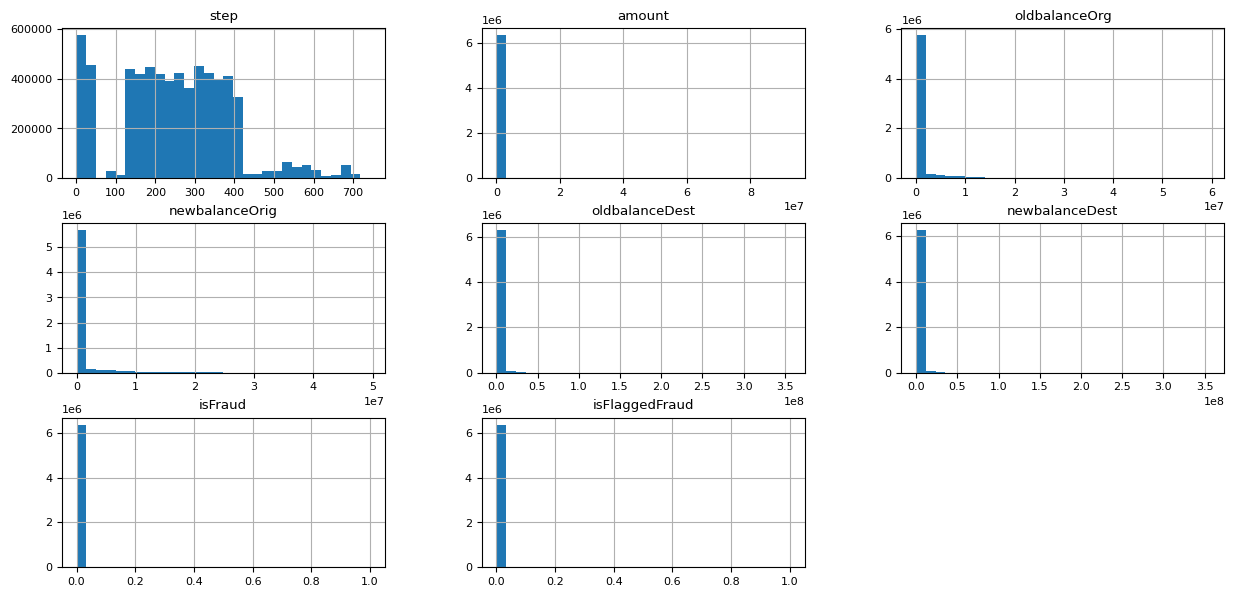

In [121]:
df.hist(bins=30 , figsize=(15, 7))
# the data is terribly skewed we will have to standarize it.

[Text(0, 0, 'step'),
 Text(0, 1, 'type'),
 Text(0, 2, 'amount'),
 Text(0, 3, 'nameOrig'),
 Text(0, 4, 'oldbalanceOrg'),
 Text(0, 5, 'newbalanceOrig'),
 Text(0, 6, 'nameDest'),
 Text(0, 7, 'oldbalanceDest'),
 Text(0, 8, 'newbalanceDest'),
 Text(0, 9, 'isFraud'),
 Text(0, 10, 'isFlaggedFraud')]

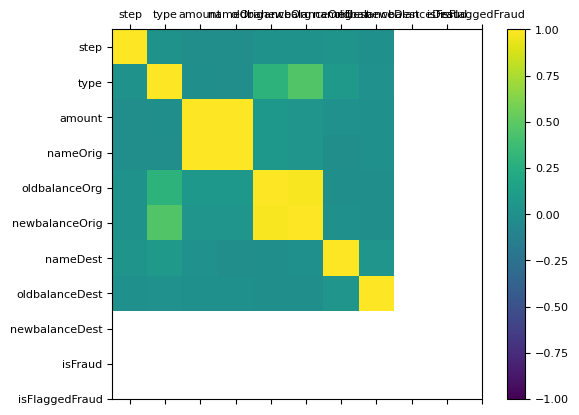

In [122]:
# setting font sizeto 30
plt.rcParams.update({'font.size': 8})

# Focus up here, as the color of each square gets lighter this means that the two columns are so correlated.
# If a column is so correlated to the target this means we have a very good thing to train on.

correlations = df.select_dtypes(exclude='object').corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, df.shape[1])
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)

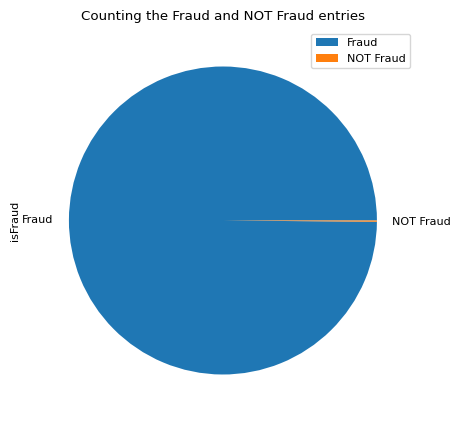

In [123]:
df['isFraud'].value_counts().plot.pie(labels=['Fraud', 'NOT Fraud'], figsize=(10, 5))
plt.legend()
plt.title('Counting the Fraud and NOT Fraud entries')
plt.show()

### Exploratory Analysis to gain some insights about the dataset.

- Which types of transactions are fraudulent?
- How many entries of Fraudulent transactions in each type?
- what is the maximum and minimum Fraudulent transaction ?

In [124]:
# show the types of Fraudulent transactions.
types_frd_trans = df[df['isFraud'] == 1]['type'].unique()
print('The types of Fraudulent transactions are : {}'.format(types_frd_trans))

# how many entries of each fraudulent transactions type?
for type in types_frd_trans:
    print('The number Fraudulent transactions for type {} are: {}'.format(type, len(df[(df['type'] == type) & (df['isFraud'] == 1)])))

The types of Fraudulent transactions are : ['TRANSFER' 'CASH_OUT']
The number Fraudulent transactions for type TRANSFER are: 4097
The number Fraudulent transactions for type CASH_OUT are: 4116


##### Let's see if the The business model (isFlaggedFraud) is doing a good job or not !
- turned out that the The business model is so misleading As it's not accurate at all.
- out of 6.3 million records there are only 16 fraudulent !! 

In [125]:
# show the types of Fraudulent transactions.
types_frd_trans = df[df['isFlaggedFraud'] == 1]['type'].unique()
print('The types considered to be Fraudulent transactions are : {}'.format(types_frd_trans))

# how many entries of each fraudulent transactions type?
for type in types_frd_trans:
    print('The number Fraudulent transactions for type {} are: {}'.format(type, len(df[(df['type'] == type) & (df['isFlaggedFraud'] == 1)])))

The types considered to be Fraudulent transactions are : ['TRANSFER']
The number Fraudulent transactions for type TRANSFER are: 16


### On what assumptions is the business model classifies the transaction fraudulent ?
- I thought maybe the model is taking some amout of transfer and saying what below is not fraudulent and what is above is fraudulent (just a try :) ) but turned out to be wrong

#### Seems that the isFlaggdFraud doesn't correlate with any variable in the dataset.

In [126]:
print('The Minimum amount of transactions considered fraudulent {}'\
                                    .format(df[df['isFlaggedFraud'] == 1]['amount'].min()))

print('The Maximum amount of transactions considered not fraudulent {}'\
                                    .format(df[df['isFlaggedFraud'] == 0]['amount'].max()))

The Minimum amount of transactions considered fraudulent 353874.22
The Maximum amount of transactions considered not fraudulent 92445516.64


- **Let's see what categorical columns can be mapped = have few unique values in them.**
- I found that only one column can be mapped (type), (nameOrig, nameDesst) can't be mapped.

In [127]:
for col in df.select_dtypes('object').columns:
    print('{} Column has {} unique values in it'.format(col, len(df[col].unique())))

type Column has 5 unique values in it
nameOrig Column has 6353307 unique values in it
nameDest Column has 2722362 unique values in it


### Data Pre-Processing:
- **Dropping usless columns**
- **Handling the categorical variables**
- **Scaling and Normalizaion**

- the isFlaggedFraud is a misleading column as we saw in the exploratory analysis So I will drop it.
- nameOrig, nameDest Those two columns can't be mapped So will be removed.

In [128]:
df.drop(['isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1, inplace=True)

- Mapping the type column to have integers values instead of strings

In [129]:
mapping = {'PAYMENT':0, 'TRANSFER':1, 'CASH_OUT':2, 'DEBIT':3, 'CASH_IN':4}

df['type'] = df['type'].map(mapping)
df['type'] = df.type.astype('int64')

df.colums

### Splitting the data and dealing with Imbalance
- Splitting the data into features (X) and target variable (y).
- Dealing with the imbalance in the target variable. Under-sample the majority class(es) by randomly picking samples with or without replacement.
- Using train_test_split to split the data into training and testing.

In [130]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [131]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1)
X_res, y_res = rus.fit_resample(X, y)

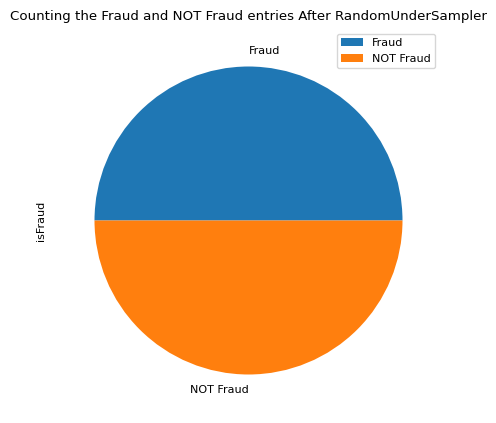

In [132]:
y_res.value_counts().plot.pie(labels=['Fraud', 'NOT Fraud'], figsize=(10, 5))
plt.legend()
plt.title('Counting the Fraud and NOT Fraud entries After RandomUnderSampler')
plt.show()

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)

- Scaling the data is so important as the Machine Learning models are so sensitive with scaling.

In [134]:
from sklearn.preprocessing import StandardScaler

# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

- **Creating and Training the Model.**
- Using the RandomForestClassifier as our Machine Learning Model
- Training it with the X_train, y_train sets
- Evaluating the Performance of the algorithm using the Classification Metrics (classification_report, roc_curve, confusion_matrix)

In [135]:
# Creating the model RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, auc, roc_curve, classification_report

parametersRF = {'n_estimators':15,'oob_score':True,'class_weight': "balanced",'n_jobs':-1,\
                 'random_state':42}
model = RandomForestClassifier(**parametersRF)


In [136]:
# Training the model and Creating the predicions llst

model.fit(X_train, y_train)

predictionsRF = model.predict(X_test)


In [137]:
# Evaluating the model with the Classification Metrics

CM_RF = confusion_matrix(y_test,predictionsRF)
CR_RF = classification_report(y_test,predictionsRF)
fprRF, recallRF, thresholdsRF = roc_curve(y_test, predictionsRF)
AUC_RF = auc(fprRF, recallRF)

resultsRF = {"Confusion Matrix":CM_RF,"Classification Report":CR_RF,"Area Under Curve":AUC_RF}

In [138]:
# Showing the results of the model

for measure in resultsRF:
    print(measure,": \n",resultsRF[measure])

Confusion Matrix : 
 [[2409   29]
 [  18 2472]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2438
           1       0.99      0.99      0.99      2490

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928

Area Under Curve : 
 0.9904380442195361
